In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


In [2]:
#import required basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15,20]

In [3]:
filename = '/kaggle/input/ccdata/CC GENERAL.csv'
df = pd.read_csv(filename)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**PRIMARY ANALYSIS**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
#numerical statistical summary
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


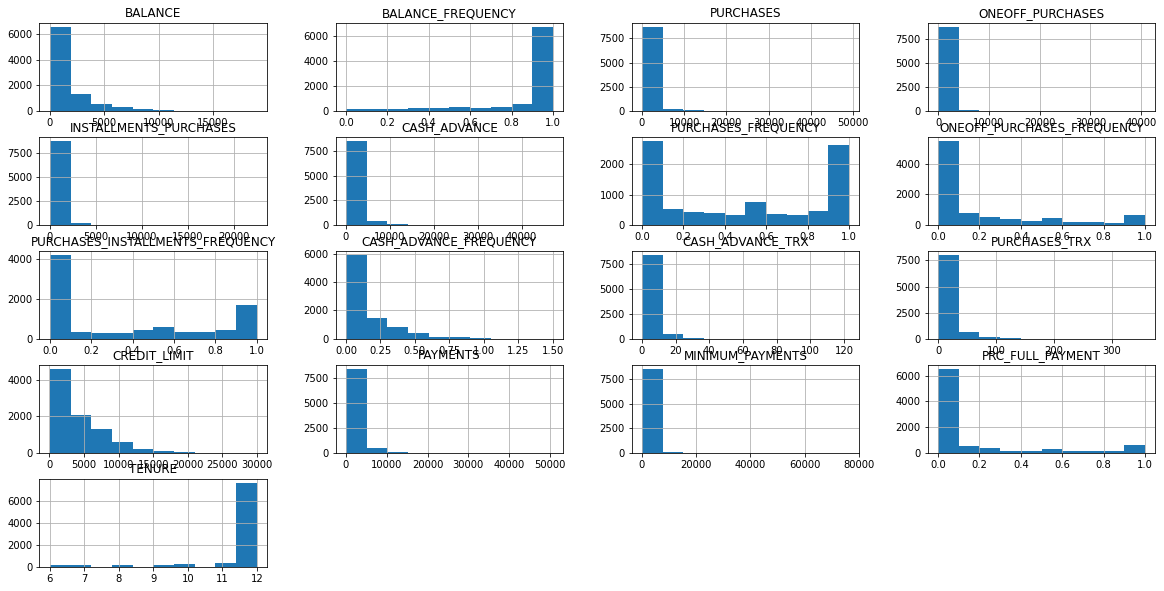

In [6]:
# Creating histogram
df.hist(figsize= [20,10])
plt.show()

In [7]:
df= df.drop(['CUST_ID'], axis=1)

Primary analysis reveals that

1) There is no target variable specifically mentioned in the problem statement.Hence a unsupervised learning clustering problem

2) Based on counts, there may be missing values in Credit limit and minimum payments column because the value is less than 8950.

3) CUST_ID column can be deleted, since it doesnot add value iiiito the problem

4) Tenure of credit card usage by customers is between 6 to 12, but average being 11.5 years. hence there may be outliers present in the dataset. The similar fluctuations are there in other columns as well.

**Missing Value Analysis**

In [8]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

1 missing value found in CREDIT_LIMIT column-fill it with mean value

313 missing values found in MINIMUM_PAYMENTS column- fill it with Mean value

In [9]:
mean_val= df['CREDIT_LIMIT'].mean()
df['CREDIT_LIMIT'].fillna(value=mean_val, inplace=True)

In [10]:
mean_val=df['MINIMUM_PAYMENTS'].mean()
df['MINIMUM_PAYMENTS'].fillna(value=mean_val, inplace=True)

In [11]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Outlier Treatment using the Z-score method**

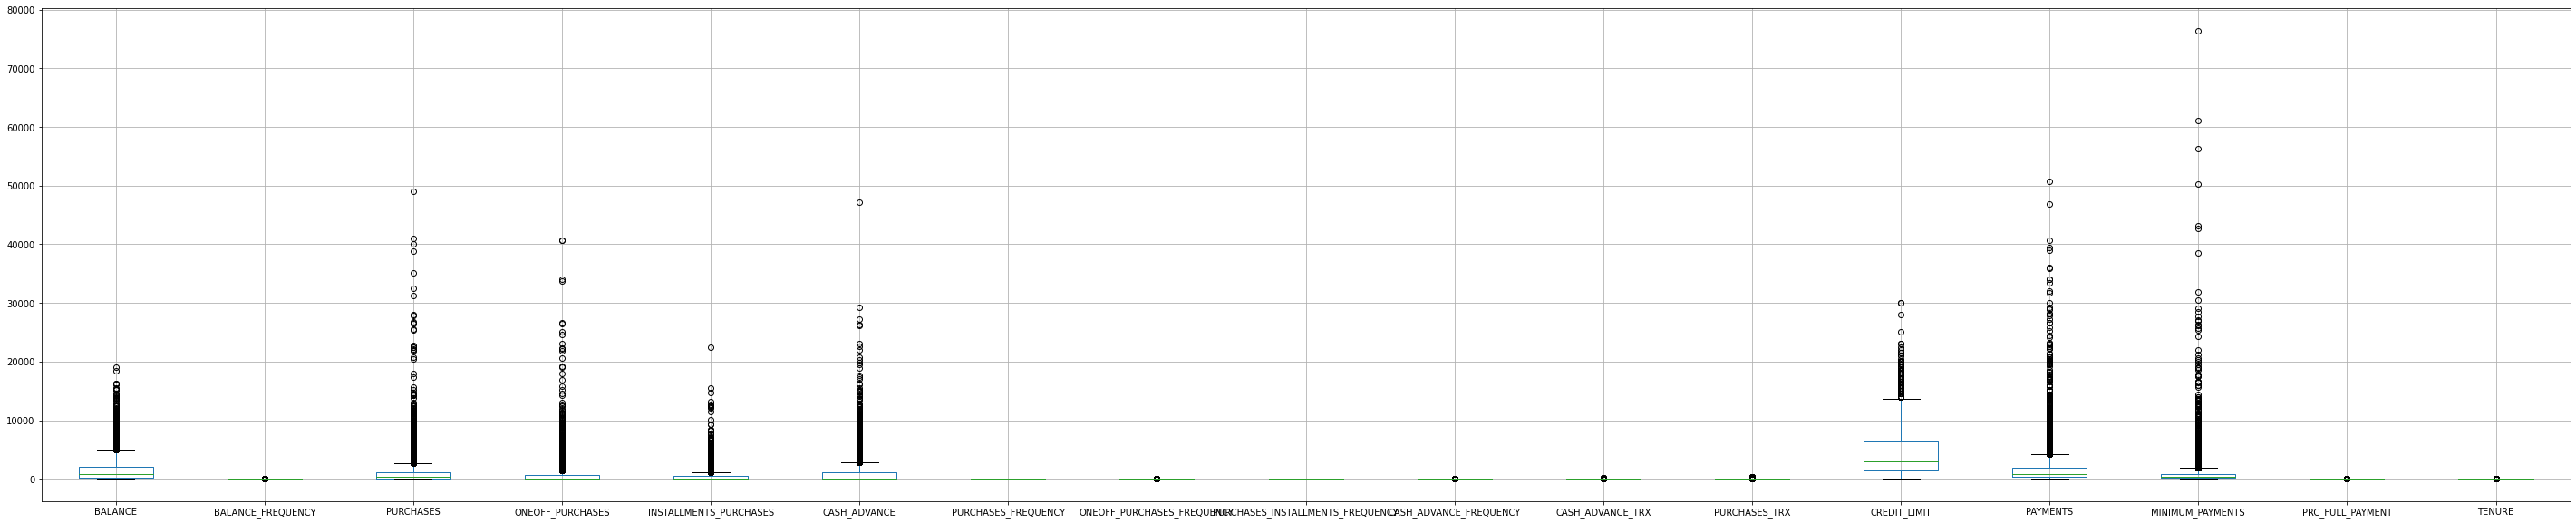

In [12]:
# Plot to see outlers
df.boxplot(figsize= [50,10])

plt.show()

Columns like balance frequency, purchase frequency, oneoff purchase frequency, purchase installmnets frequency, purchase installment frequency, cash advance frequency, cash advance trx, purchse trx, PRC_FULL_PAYMENT, TENURE are not visible in above because of their values being low.

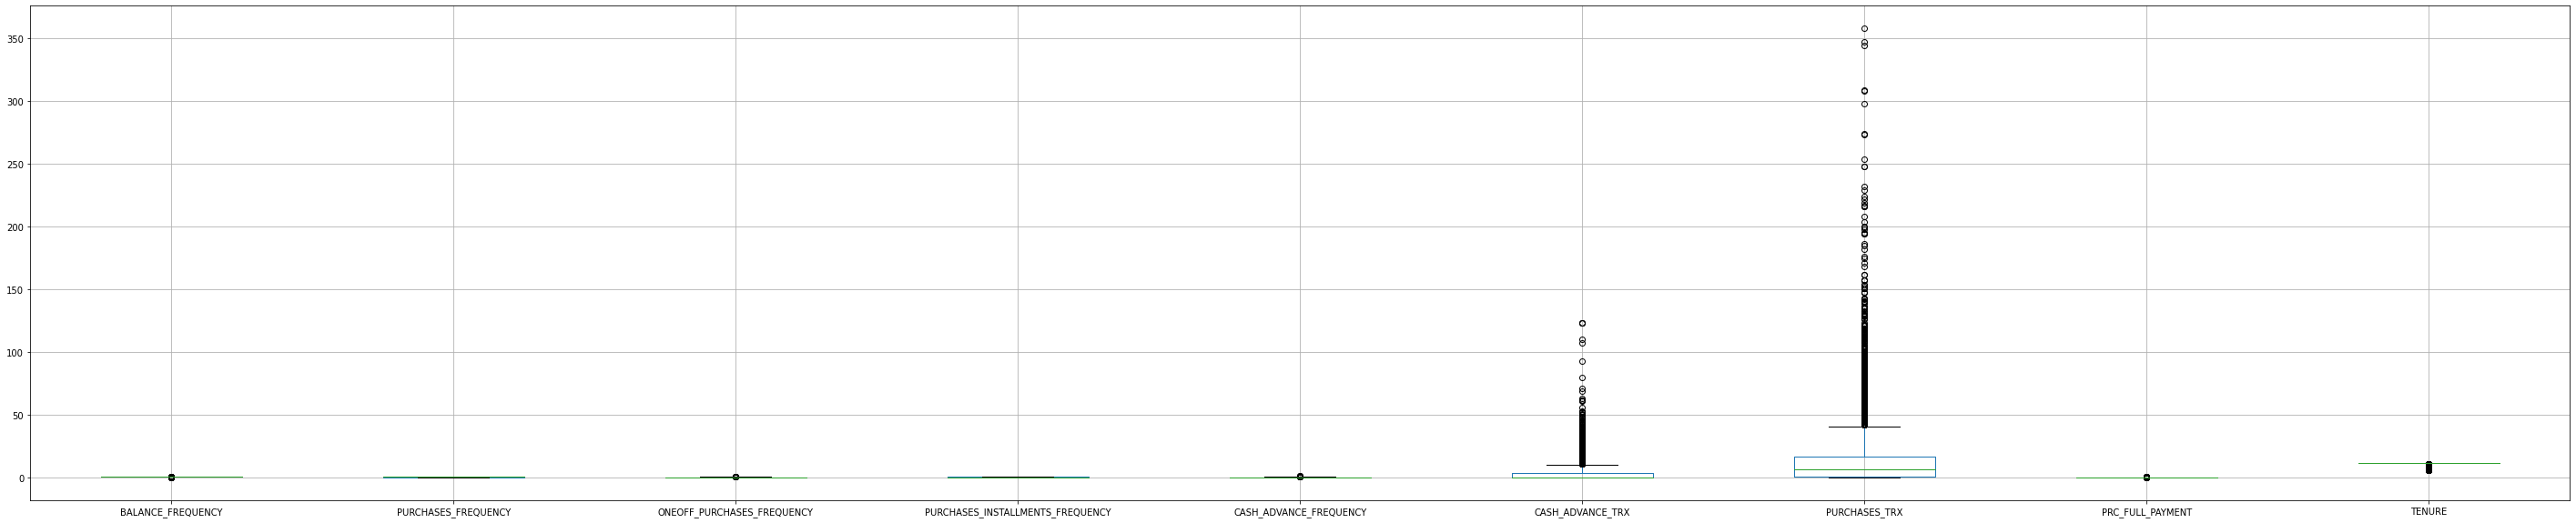

In [13]:
df.drop(['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'], axis=1).boxplot(figsize= [50,10])

plt.show()

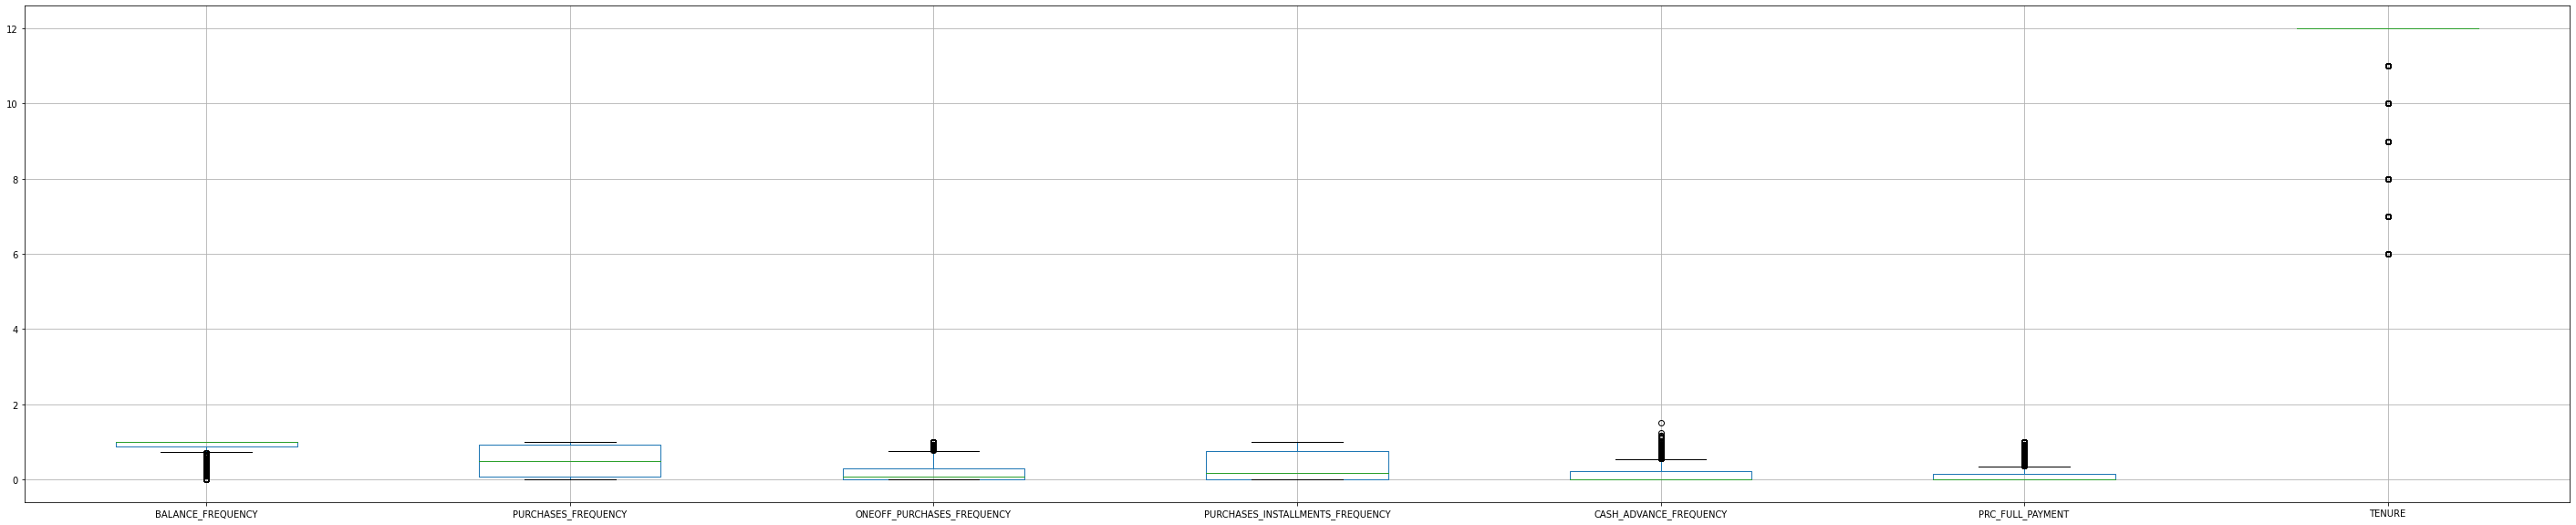

In [14]:
df.drop(['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS','CASH_ADVANCE_TRX','PURCHASES_TRX', 'MINIMUM_PAYMENTS'], axis=1).boxplot(figsize= [50,10])

plt.show()

In [15]:
from scipy.stats import zscore 
df['zscore1'] = ( df.CASH_ADVANCE - df.CASH_ADVANCE.mean() ) / df.CASH_ADVANCE.std()
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,-0.368633
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759


In [16]:
df[df['zscore1']>3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,3.335717
36,7427.076941,1.000000,0.00,0.00,0.00,8873.375046,0.000000,0.000000,0.000000,0.727273,11,0,9000.0,1636.361601,1986.843608,0.000000,11,3.764372
50,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8,3.600948
71,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12,12.549146
128,11167.234030,1.000000,150.64,150.64,0.00,8362.154254,0.083333,0.083333,0.000000,0.500000,14,1,17000.0,2606.059389,2894.077159,0.000000,12,3.520604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8315,2648.244646,1.000000,0.00,0.00,0.00,10458.978150,0.000000,0.000000,0.000000,1.000000,123,0,4000.0,9818.531412,665.888853,0.000000,12,4.520442
8422,3911.628474,0.875000,0.00,0.00,0.00,11951.903320,0.000000,0.000000,0.000000,0.500000,40,0,7000.0,7918.877416,905.569605,0.166667,8,5.232320
8705,7302.672686,1.000000,0.00,0.00,0.00,10762.707760,0.000000,0.000000,0.000000,0.750000,19,0,9000.0,3824.308564,2214.506825,0.000000,12,4.665270
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,6.650849


In [17]:
df[df['zscore1']<-3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1


In [18]:
df_new = df[(df.zscore1>-3) & (df.zscore1<3)]

In [19]:
from scipy.stats import zscore 
df_new['zscore2'] = (df_new.PURCHASES - df_new.PURCHASES.mean() ) / df_new.PURCHASES.std()
df_new.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759,-0.426048
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459,-0.470841
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759,-0.107817
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,-0.368633,0.232979
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759,-0.463328


In [20]:
df_new[df_new['zscore2']>3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
125,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12,-0.466759,5.380597
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12,-0.466759,9.863385
153,13673.079610,1.000000,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.000000,12,0.698836,4.126864
171,975.942008,1.000000,10221.35,7141.38,3079.97,1620.685551,1.000000,1.000000,0.833333,0.583333,18,130,10500.0,10693.495850,347.641073,0.750000,12,0.306039,4.328347
204,4559.779234,1.000000,10848.50,8208.00,2640.50,0.000000,1.000000,0.666667,1.000000,0.000000,0,123,7500.0,9423.715495,2925.275522,0.000000,12,-0.466759,4.622810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,561.003319,1.000000,11577.00,10975.00,602.00,875.583070,1.000000,1.000000,0.500000,0.250000,6,97,5500.0,12148.503510,188.413837,0.666667,12,-0.049251,4.964860
7378,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.250000,0.250000,0.000000,0.083333,2,8,13450.0,508.797444,1725.645623,0.000000,12,-0.230001,5.160985
7553,2017.391656,1.000000,12024.37,11224.10,800.27,0.000000,1.000000,1.000000,0.500000,0.000000,0,133,8000.0,11516.392320,556.651236,0.333333,12,-0.466759,5.174911
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,-0.466759,3.383858


In [21]:
df_new[df_new['zscore2']<-3]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2


In [22]:
df_new = df_new[(df_new.zscore2>-3) & (df_new.zscore2<3)]

In [23]:
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759,-0.426048
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459,-0.470841
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759,-0.107817
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,-0.368633,0.232979
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759,-0.463328


**Dealing with correlated variables**

In [24]:
corr = df_new.corr()
corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2
BALANCE,1.000000,0.330235,0.113048,0.113233,0.054510,0.506549,-0.091860,0.057981,-0.078306,0.434583,0.374002,0.105158,0.486152,0.251988,0.370143,-0.333967,0.083205,0.506549,0.113048
BALANCE_FREQUENCY,0.330235,1.000000,0.179192,0.135718,0.149591,0.108386,0.229482,0.198327,0.174689,0.190031,0.144872,0.202031,0.081352,0.050751,0.115819,-0.100518,0.118538,0.108386,0.179192
PURCHASES,0.113048,0.179192,1.000000,0.862500,0.684287,-0.130420,0.547472,0.619651,0.427354,-0.171325,-0.114478,0.730493,0.317229,0.412531,0.036630,0.194010,0.109471,-0.130420,1.000000
ONEOFF_PURCHASES,0.113233,0.135718,0.862500,1.000000,0.221265,-0.085490,0.345474,0.697550,0.124605,-0.107494,-0.072112,0.544201,0.295425,0.360160,-0.008351,0.115116,0.075905,-0.085490,0.862500
INSTALLMENTS_PURCHASES,0.054510,0.149591,0.684287,0.221265,1.000000,-0.128266,0.556997,0.188924,0.643692,-0.175305,-0.116775,0.623577,0.185565,0.276044,0.082447,0.207951,0.101542,-0.128266,0.684287
CASH_ADVANCE,0.506549,0.108386,-0.130420,-0.085490,-0.128266,1.000000,-0.272199,-0.110586,-0.226847,0.689780,0.658455,-0.126362,0.247018,0.315624,0.128465,-0.203937,-0.083854,1.000000,-0.130420
PURCHASES_FREQUENCY,-0.091860,0.229482,0.547472,0.345474,0.556997,-0.272199,1.000000,0.486095,0.862344,-0.311914,-0.222648,0.619908,0.113578,0.097669,-0.009092,0.301563,0.055551,-0.272199,0.547472
ONEOFF_PURCHASES_FREQUENCY,0.057981,0.198327,0.619651,0.697550,0.188924,-0.110586,0.486095,1.000000,0.115044,-0.107809,-0.074171,0.547826,0.278518,0.222537,-0.041803,0.137427,0.076534,-0.110586,0.619651
PURCHASES_INSTALLMENTS_FREQUENCY,-0.078306,0.174689,0.427354,0.124605,0.643692,-0.226847,0.862344,0.115044,1.000000,-0.267194,-0.187054,0.570827,0.046994,0.074806,0.020767,0.246289,0.067850,-0.226847,0.427354
CASH_ADVANCE_FREQUENCY,0.434583,0.190031,-0.171325,-0.107494,-0.175305,0.689780,-0.311914,-0.107809,-0.267194,1.000000,0.822662,-0.150617,0.093578,0.147825,0.088675,-0.253311,-0.134657,0.689780,-0.171325


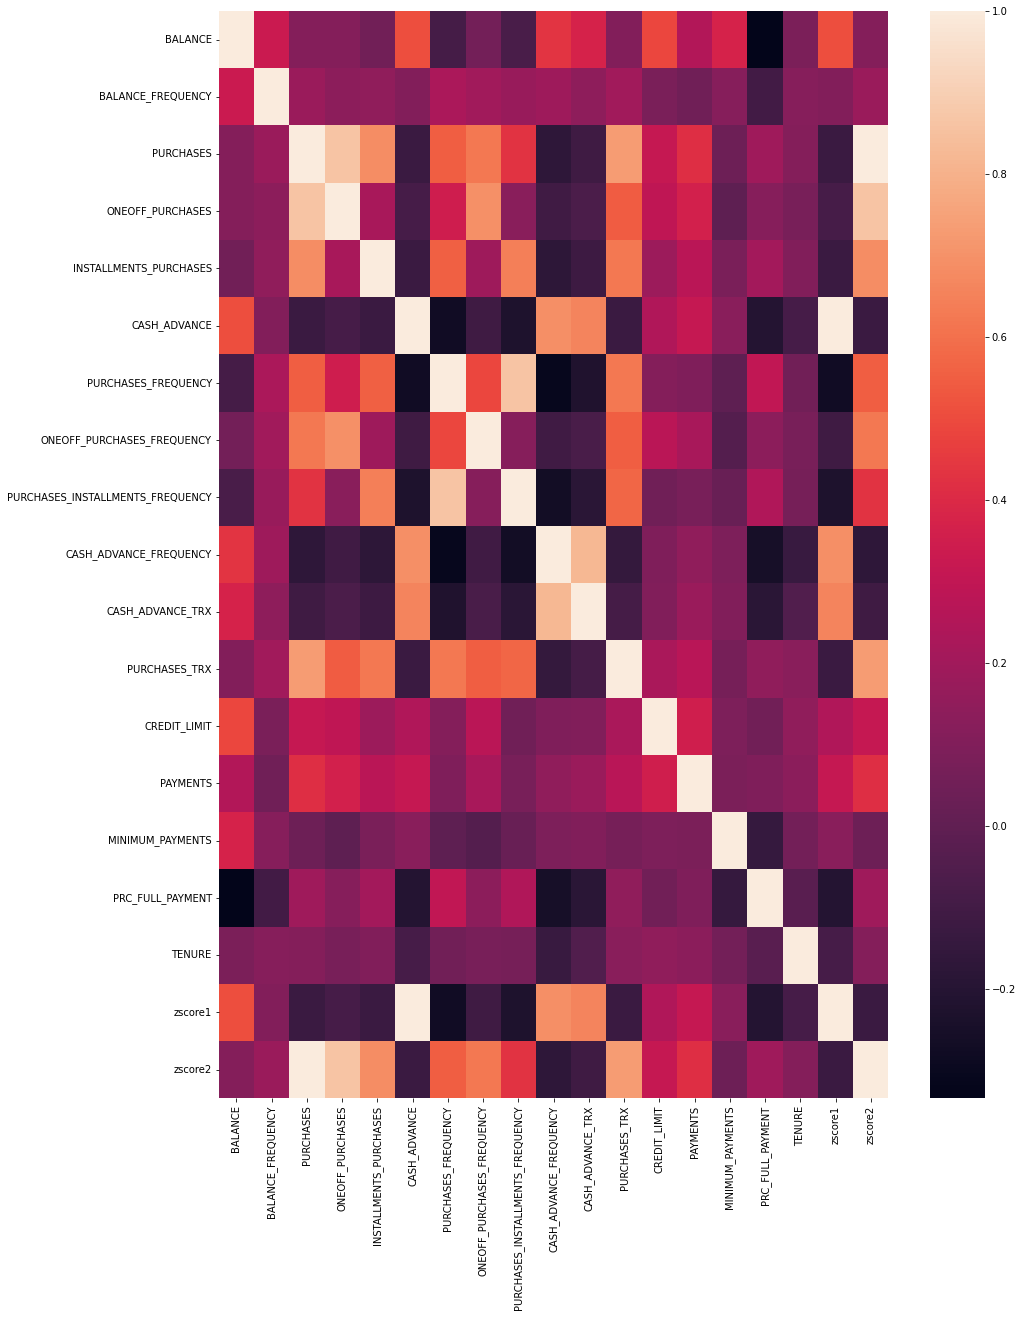

In [25]:
sns.heatmap(corr)
plt.show()

**Dimensionality Reduction using PCA such that the 95% of the variance is explained**

Perform PCA with the following steps:

1. Filter the numerical variables
2. Scale the data to get variables on the same scale
3. Decide the number of principal components
4. Obtain principal components

In [26]:
df_numeric_features = df_new.select_dtypes(include=[np.number])
df_num = df_numeric_features.drop('TENURE',axis=1)
df_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,zscore1,zscore2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,-0.466759,-0.426048
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,2.605459,-0.470841
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,-0.466759,-0.107817
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,-0.368633,0.232979
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,-0.466759,-0.463328


In [27]:
df_num.shape

(8636, 18)

In [28]:
from sklearn.preprocessing import StandardScaler
df_num_std = StandardScaler().fit_transform(df_num)
print(df_num_std)

[[-0.73266711 -0.23380085 -0.60997863 ... -0.52219597 -0.56877272
  -0.60997863]
 [ 0.92083437  0.1454145  -0.69052051 ...  0.24091211  4.1599222
  -0.69052051]
 [ 0.5509063   0.52462985 -0.03776823 ... -0.52219597 -0.56877272
  -0.03776823]
 ...
 [-0.7418207  -0.17060038 -0.56861016 ...  0.33630148 -0.56877272
  -0.56861016]
 [-0.74701991 -0.17060038 -0.69052051 ...  0.33630148 -0.541941
  -0.69052051]
 [-0.55913165 -0.86582644  0.23246077 ... -0.52219597 -0.47553377
   0.23246077]]


In [29]:
from sklearn.decomposition import PCA
# specify required no of components
# take 'n_components=11, 
# i have tried to achive 95% variance by trial and error- for n=2,var=50%; for n=7, var=83.8%; for n=10, var= 93.8%
pca = PCA(n_components=11, random_state=0) #PCA is the imported class, pca is the object of PCA

# fit_transform() computes the principal components 
# pass the standardized data to fit PCA
PrincipalComponents = pca.fit_transform(df_num_std)

In [30]:
# create a dataframe of principal components
PCA_df = pd.DataFrame(data = PrincipalComponents, columns = ['PC1', 'PC2', 'PC3','PC4','PC5', 'PC6', 'PC7', 'PC8','PC9','PC10','PC11'])

# head() to display top three rows
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.506391,-1.871023,-0.348850,0.384578,-0.179415,0.537400,-0.314464,0.386505,0.009253,-0.222162,0.171898
1,-2.998340,4.343106,-0.088687,-1.716025,1.364063,-0.754314,-0.037351,0.566589,1.821780,-2.473799,0.416028
2,1.178928,-0.176162,-1.405418,1.521944,-0.869019,-1.713610,0.136077,-1.057268,0.822848,0.493252,0.705430
3,-0.208953,-0.285711,-1.967975,0.761728,0.685722,0.286749,-0.525423,-0.519114,-1.072289,-0.395195,-0.908136
4,-1.566321,-1.493307,-0.486457,0.844961,-0.405203,0.115759,-0.145018,0.924077,0.111874,-0.138502,0.343224


In [31]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(var)

[31.4 53.6 62.3 69.4 75.5 80.2 84.4 88.  91.1 93.6 95.6]


Thus acheiving variance of 95.6% by reducing features from 16 to 11 by PCA using sklearn

**Finding the optimum value of k for k-means clustering using the Elbow method**

In [32]:
# generate the covariance matrix using 'cov' function
cov_mat = np.cov(df_num_std.T) #.T to transpose as numpy considers a row as the variable/feature

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00011581  0.33027315  0.11306074  0.1132461   0.05451607  0.50660739
  -0.09187064  0.05798732 -0.07831485  0.43463295  0.37404505  0.10517045
   0.48620814  0.252017    0.37018626 -0.33400528  0.50660739  0.11306074]
 [ 0.33027315  1.00011581  0.1792129   0.13573326  0.1496087   0.10839832
   0.22950864  0.19834948  0.17470953  0.19005281  0.14488912  0.20205414
   0.08136138  0.05075707  0.1158325  -0.10052938  0.10839832  0.1792129 ]
 [ 0.11306074  0.1792129   1.00011581  0.86259997  0.68436645 -0.13043548
   0.54753521  0.61972248  0.42740388 -0.17134531 -0.11449118  0.73057797
   0.31726588  0.41257881  0.03663394  0.19403207 -0.13043548  1.00011581]
 [ 0.1132461   0.13573326  0.86259997  1.00011581  0.22129035 -0.08549995
   0.34551447  0.6976305   0.12461907 -0.10750673 -0.07212027  0.544264
   0.2954592   0.36020217 -0.00835211  0.11512979 -0.08549995  0.86259997]
 [ 0.05451607  0.1496087   0.68436645  0.22129035  1.00011581 -0.12828116
   0.55706103  0.18894556  0.6437667

In [33]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [ 5.65958265e+00  4.00231807e+00  1.57047236e+00  1.28159189e+00
  1.10179590e+00  8.53152823e-01  7.50108683e-01  6.56261076e-01
  5.61013409e-01  4.53552649e-01  3.52008718e-01  2.99502717e-01
  2.53819051e-01  1.64166388e-01  4.26856596e-02  5.24995966e-05
 -7.17531831e-17 -1.71359268e-17] 

Eigenvectors: 
 
 [[-1.48754178e-02  3.69625541e-01 -7.47229306e-02  3.71989908e-01
   1.79118683e-01 -2.06385667e-01  1.28785753e-01 -2.51738831e-02
  -1.21831413e-01 -3.74022813e-02  7.80678248e-02  6.24611030e-01
  -4.50286995e-01  1.09764058e-01  3.96868643e-03  8.93417480e-05
  -2.78450430e-16 -1.87529104e-16]
 [ 8.20290683e-02  1.61111051e-01 -2.41875670e-01  3.45520225e-01
  -4.51309941e-01 -3.63443006e-01 -1.26079773e-01  6.12471285e-01
   2.08869304e-03 -7.77566696e-02 -3.86015750e-02 -1.46495713e-01
   1.78238603e-01  4.22229805e-02  9.18753777e-03  3.08458730e-05
  -7.10530276e-17 -2.03761101e-16]
 [ 3.82471682e-01  1.27323506e-01  1.41636179e-01 -3.42724926e-03
  -9.

In [34]:
# create a list of eigenvalues
eig_val = list(eig_val) #Optional

# 'sort(reverse = True)' will sort the eigenvalues in the descending order

eig_val.sort(reverse = True) #Descending order
print(eig_val)

[5.659582654545702, 4.002318065759828, 1.5704723596093264, 1.2815918937233857, 1.101795895263547, 0.853152822916329, 0.7501086828960076, 0.6562610759299554, 0.5610134086800141, 0.45355264856913136, 0.35200871792487154, 0.2995027165009726, 0.2538190505091229, 0.164166387592839, 0.04268565964653664, 5.249959660348511e-05, -1.7135926761927186e-17, -7.175318311418832e-17]


**Plotting Elbow Curve**

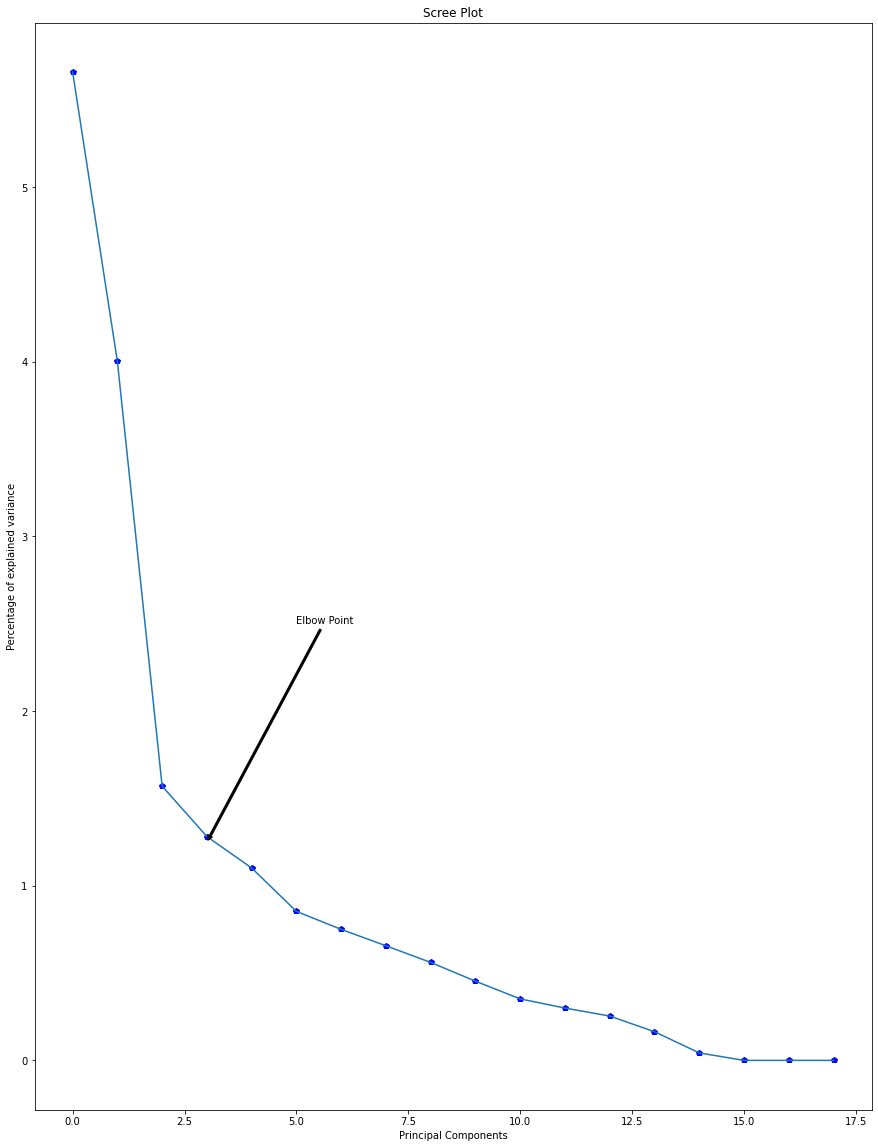

In [35]:
plt.plot(eig_val,'bp')            

# plot a line plot
plt.plot(eig_val) 

# label the x-axis
plt.xlabel('Principal Components')    

# label the y-axis
plt.ylabel('Percentage of explained variance')      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate('Elbow Point', xy=(3,1.25), xytext=(5, 2.5), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

# title of the plot
plt.title('Scree Plot')

plt.show()   

From the above elbow plot we can consider no of clusters = 2

**Finding the optimum value of k for k-means clustering using the silhouette score method**

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# create a list for different values of K
n_clusters = [2,3,4, 5, 6,7, 8, 9,10]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters :
    cluster = KMeans(n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_num_std)
    
    score = silhouette_score(df_num_std, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.31719510446071086)
For n_clusters = 3, silhouette score is 0.28519474571532843)
For n_clusters = 4, silhouette score is 0.20588239650583237)
For n_clusters = 5, silhouette score is 0.2023247327206029)
For n_clusters = 6, silhouette score is 0.2138227139141098)
For n_clusters = 7, silhouette score is 0.21931749262847516)
For n_clusters = 8, silhouette score is 0.2223907276453778)
For n_clusters = 9, silhouette score is 0.19827762807074018)
For n_clusters = 10, silhouette score is 0.1910549563449926)


Silhoutte score is high for n_clusters= 2

For both the methods we have got n=2 hence proceed in building the model with n=2

**Build a K-means clustering model**

In [40]:
# building a K-Means model 

model = KMeans(n_clusters= 2, random_state= 10)

# fit the model
model.fit(df_num_std)

KMeans(n_clusters=2, random_state=10)

In [42]:
df_output = df_new.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
df_output['Cluster'] = model.labels_

# head() to display top five rows
df_output.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore1,zscore2,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.466759,-0.426048,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.605459,-0.470841,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-0.466759,-0.107817,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,-0.368633,0.232979,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.466759,-0.463328,0


In [43]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([6930, 1706]))

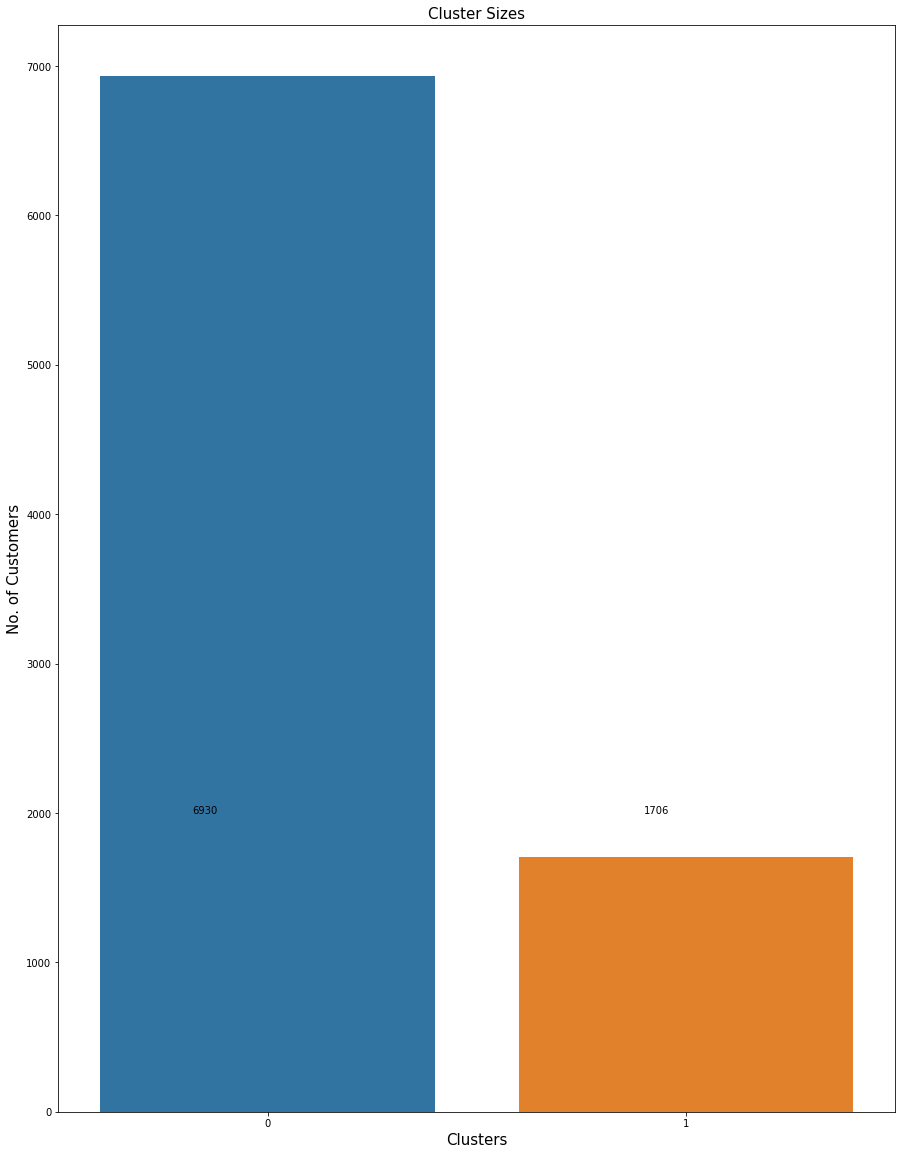

In [46]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])

plt.show()

2 Clusters are obtained having 6930 and 1706 no of observations.